<a href="https://colab.research.google.com/github/reg4762/PVCK_Ganjil_2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 11
## Nama : Regita Delya Putri
## Absen : 21
## Nim : 2241720137
## Kelas : TI-3F


---

# LATIHAN PRAKTIKUM

## 1.	Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## 2.	Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

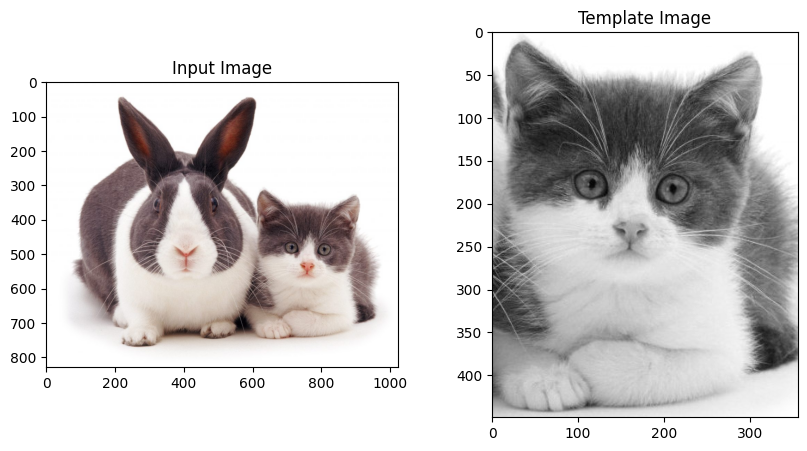

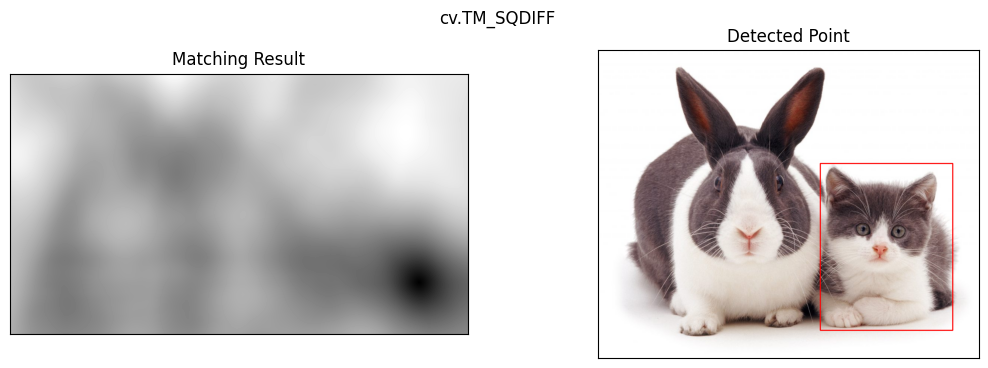

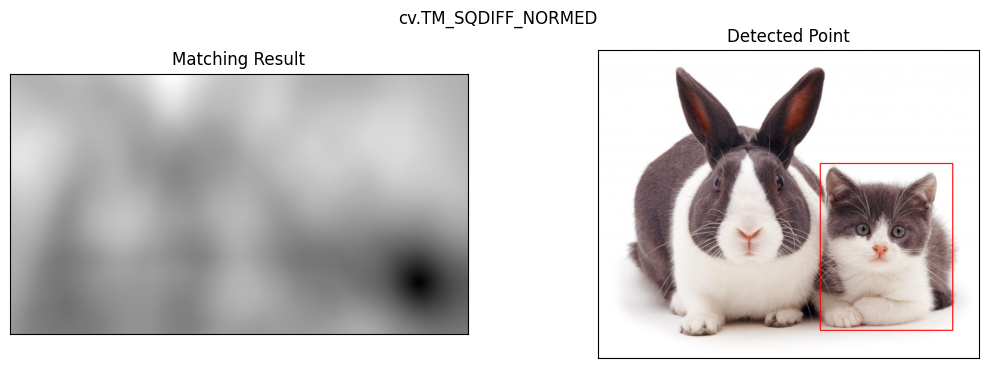

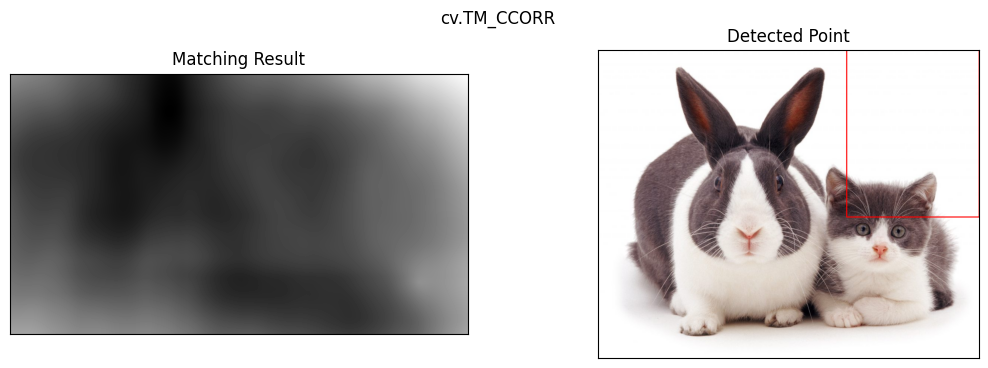

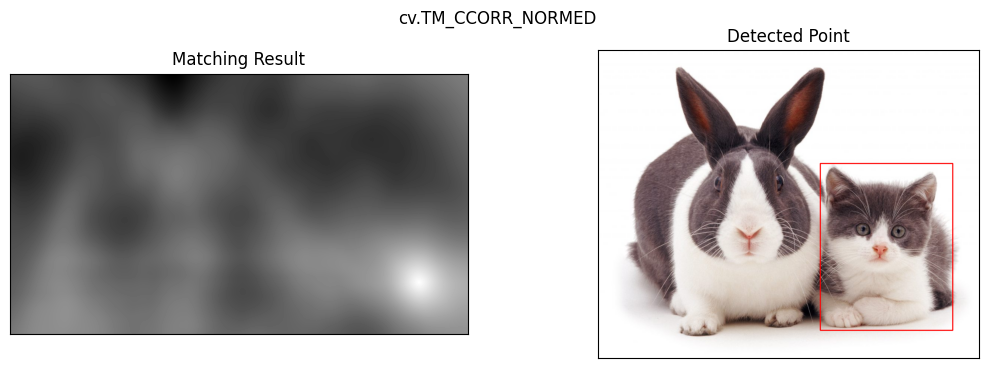

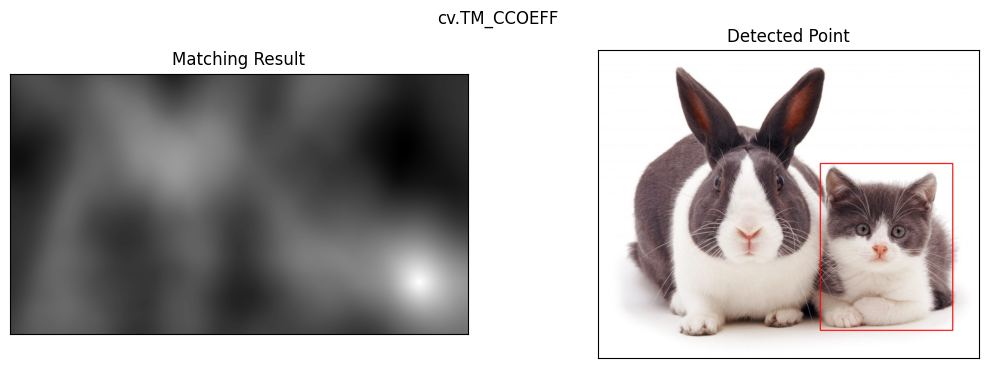

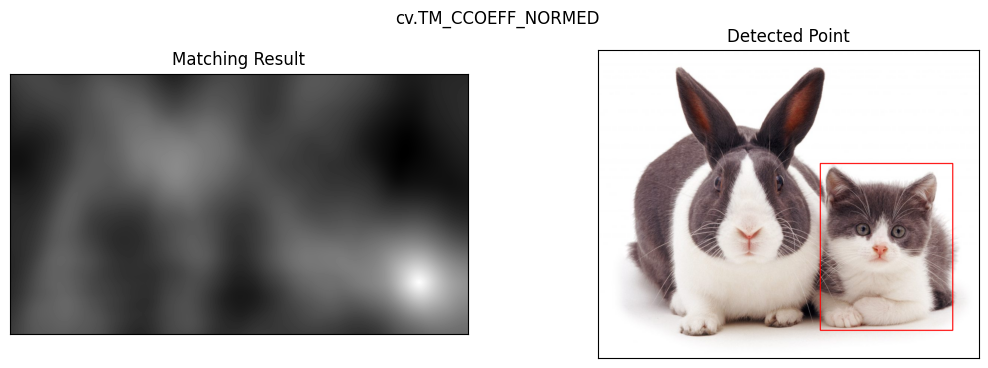

In [2]:
# Load the input image and template in grayscale
image = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/cats_and_bunnies.jpg', cv.IMREAD_GRAYSCALE)
templ = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)

# Check if images are loaded successfully
if image is None or templ is None:
    print("Error: Could not load images.")
    exit()

# Check if the template is larger than the image
if templ.shape[0] > image.shape[0] or templ.shape[1] > image.shape[1]:
    print("Error: Template size is larger than the input image.")
    exit()

# Convert input image to RGB for display purposes
img_rgb = cv.cvtColor(cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/cats_and_bunnies.jpg'), cv.COLOR_BGR2RGB)
template_rgb = cv.cvtColor(cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/cat2_templatejpg.jpg'), cv.COLOR_BGR2RGB)

# Display original input and template images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img_rgb, extent=[0, image.shape[1], image.shape[0], 0])  # extent defines the ruler
plt.title('Input Image')

plt.subplot(122)
plt.imshow(templ, cmap='gray', extent=[0, templ.shape[1], templ.shape[0], 0])
plt.title('Template Image')

plt.show()

methods = ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']

# Loop through each method to perform template matching
for meth in methods:
    img2 = image.copy()
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img2, templ, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + templ.shape[1], top_left[1] + templ.shape[0])

    # Draw rectangle on matched area
    img_rgb_result = img_rgb.copy()  # Copy RGB image for result display
    cv.rectangle(img_rgb_result, top_left, bottom_right, (255, 0, 0), 2)

    # Plot matching result and detected point
    plt.figure(figsize=(13, 4))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_rgb_result)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


## 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

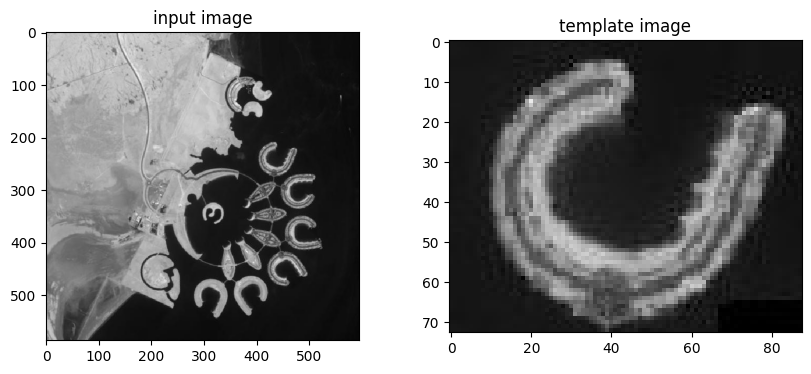

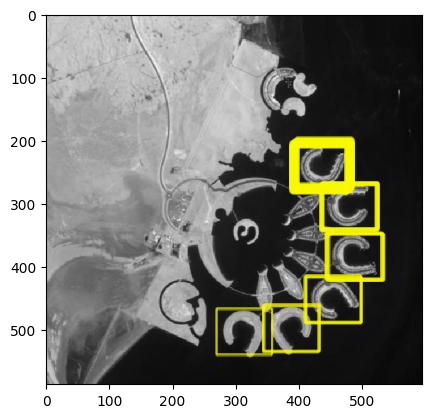

In [4]:
main_image = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/bahrain-template.jpg', 0)

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(10,4))
axarr[0].imshow(cv.cvtColor(main_image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(main_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(main_image, cmap=plt.cm.gray)
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.2)
    ax.add_patch(rect)

plt.show()


## 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

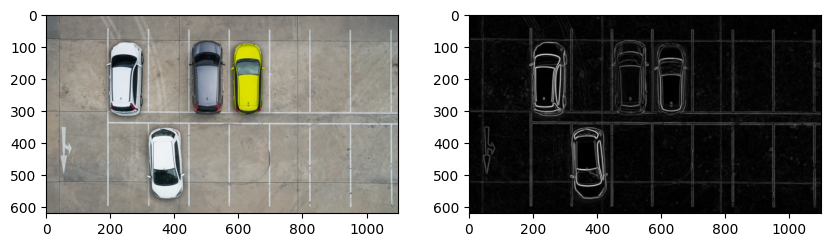

In [7]:
# Sobel Edge Detection
input_img = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/car-park.jpg')

def sobel_edge_detection(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    grad_x = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=5)
    grad_y = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = cv.magnitude(grad_x, grad_y)
    gradient_normalized = cv.normalize(gradient_  magnitude, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
    return gradient_normalized

# Penerapan
sobel_edges = sobel_edge_detection(input_img)

# Output
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[1].imshow(sobel_edges, cmap='gray')
plt.show()


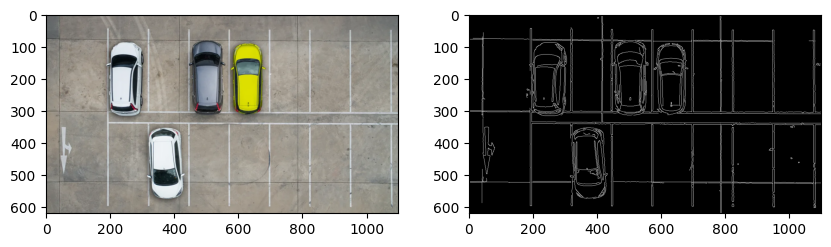

In [10]:
# Canny Edge Detection
def canny_edge_detection(image, threshold1=50, threshold2=150):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    edges = cv.Canny(blurred, threshold1, threshold2)
    return edges

# penerapan
canny_edges = canny_edge_detection(input_img)

# Output
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[1].imshow(canny_edges, cmap='gray')
plt.show()


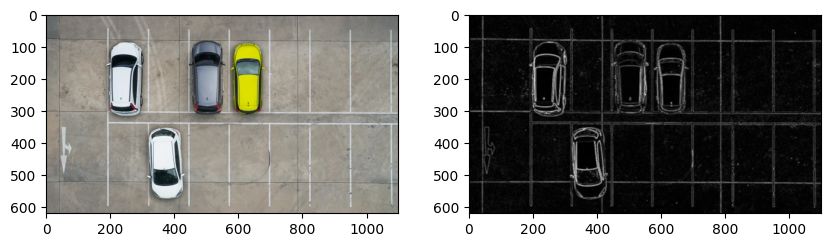

In [13]:
# Laplacian Edge Detection
def laplacian_edge_detection(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (3, 3), 0)
    edges = cv.Laplacian(blurred, cv.CV_64F, ksize=3)
    edges_abs = cv.convertScaleAbs(edges)
    return edges_abs

# Penerapan
laplacian_edges = laplacian_edge_detection(input_img)

# Output
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[1].imshow(laplacian_edges, cmap='gray')
plt.show()


## 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

<ipython-input-15-ef47058bd986>:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


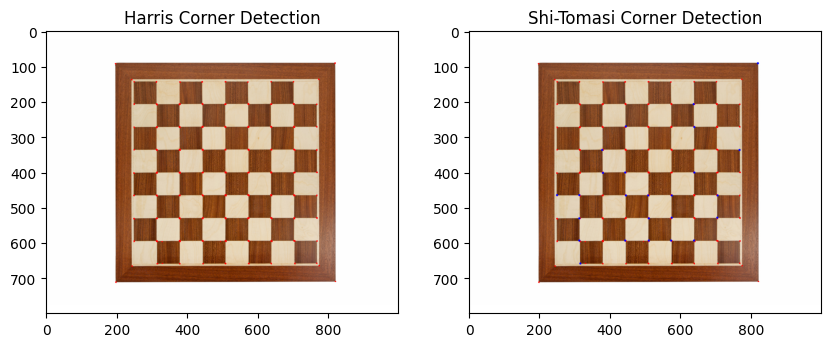

In [15]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

# Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray, 25, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.show()

## 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:


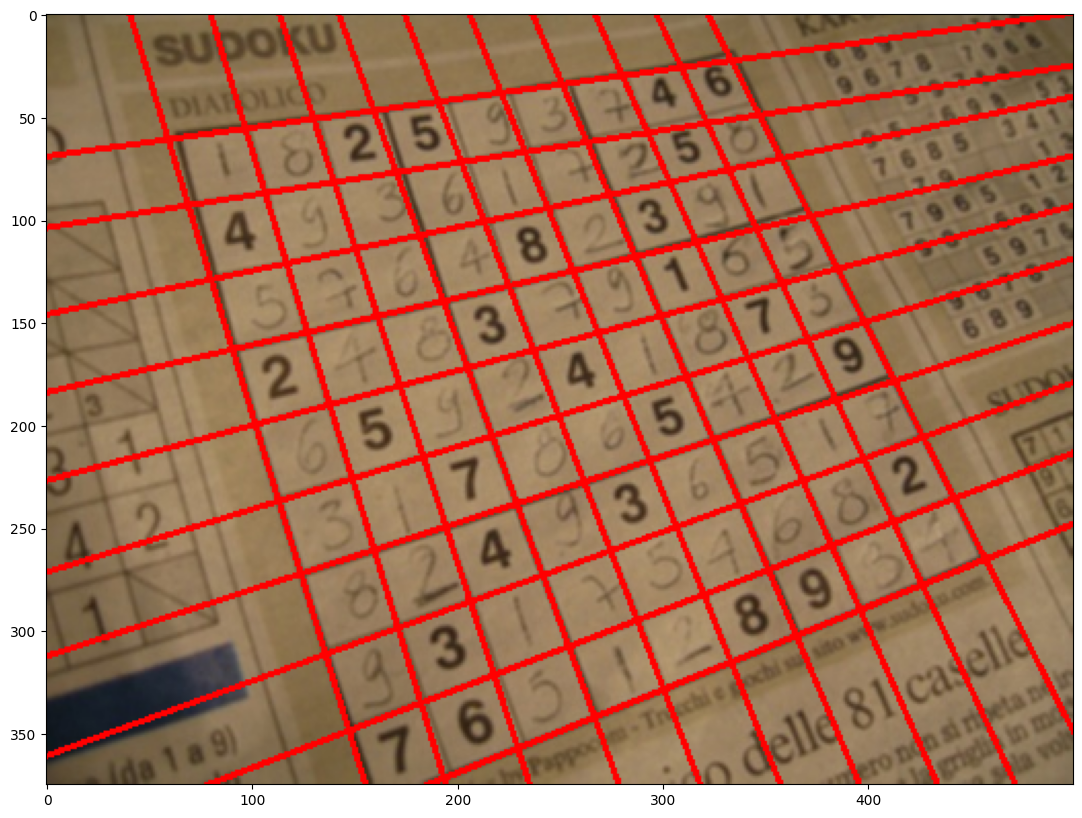

In [20]:
img = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/sudoku.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Dilation and erosion to strengthen edges
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Detect lines using Hough Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Check if any lines were detected
if lines is None:
    print('No lines were found')
else:
    # Set filter flag to True to enable line filtering
    filter = True
    if filter:
        rho_threshold = 15
        theta_threshold = 0.1

        # Group similar lines
        similar_lines = {i: [] for i in range(len(lines))}
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                rho_i, theta_i = lines[i][0]
                rho_j, theta_j = lines[j][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    similar_lines[i].append(j)

        # Sort lines based on similarity count
        indices = list(range(len(lines)))
        indices.sort(key=lambda x: len(similar_lines[x]), reverse=True)

        # Filter out duplicate or similar lines
        line_flags = [True] * len(lines)
        for i in range(len(lines) - 1):
            if not line_flags[indices[i]]:
                continue
            for j in range(i + 1, len(lines)):
                if not line_flags[indices[j]]:
                    continue
                rho_i, theta_i = lines[indices[i]][0]
                rho_j, theta_j = lines[indices[j]][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    line_flags[indices[j]] = False

        # Filtered lines based on the flags
        filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]
    else:
        filtered_lines = lines

    # Draw the detected lines on the image
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the result
    plt.figure(figsize=(20, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.show()

## 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

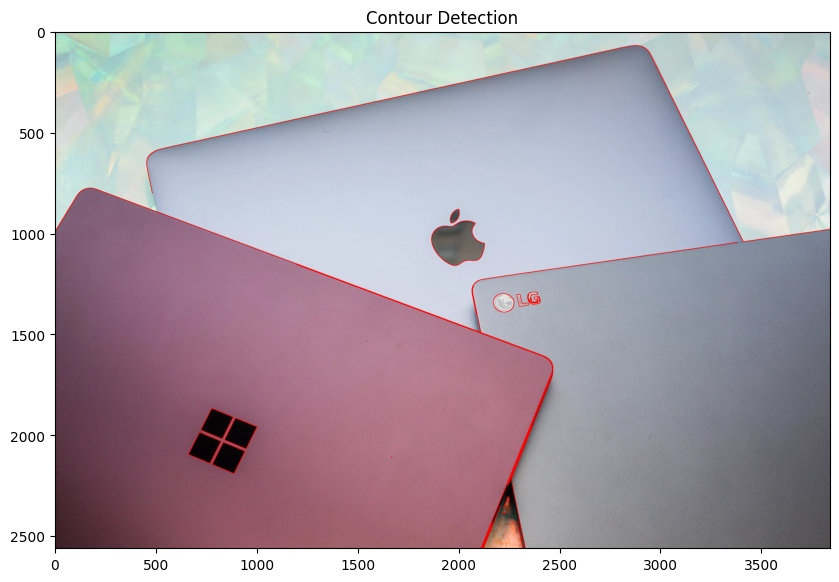

In [26]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PVCK/Images/object-detection/laptop.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Perform Canny edge detection
edges = cv.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv.drawContours(img, contours, -1, (0, 0, 255), 2)

# Display the original image with contours
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.show()

# PENGAYAAN MATERI KTP

## 1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

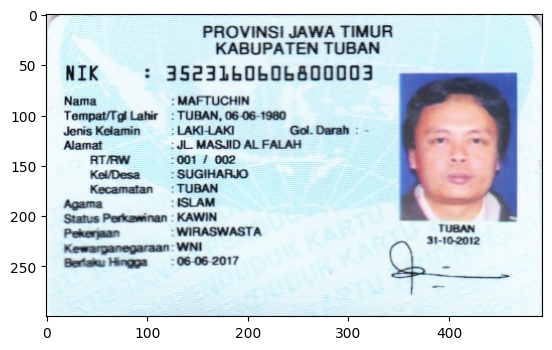

In [33]:
img = cv.imread('/content/drive/MyDrive/PVCK/Images/ktp3.png')
original_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.show()

## 2. Muat 2 library berikut sebagai tahapan persiapan

In [34]:
import cv2
import os

## 3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [36]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PVCK/Images"

# Looping untuk setiap file di dalam direktori
for name_file in sorted(os.listdir(path_plate)):
    # Periksa jika file adalah gambar yang diinginkan
    if name_file == 'ktp3.png':
        # Baca gambar dari file
        src = cv.imread(os.path.join(path_plate, name_file))
        if src is None:
            continue

        # Buat salinan gambar untuk di-blur
        blurred = src.copy()

        # Konversi gambar ke grayscale
        gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

## 4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [39]:
# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

## 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

168.0 (300, 493)


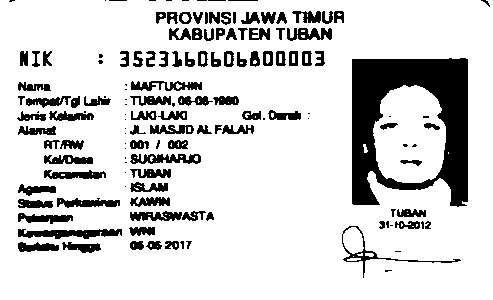

In [45]:
from google.colab.patches import cv2_imshow

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

## 6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

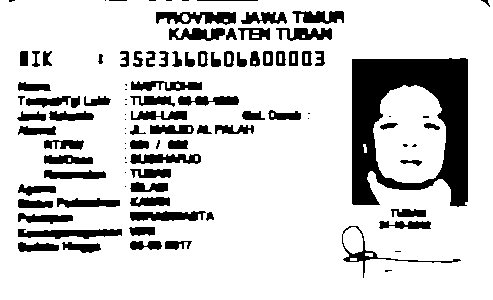

In [47]:
# menggunakan opening
kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel, iterations=1)

cv2_imshow(opening)

## 7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

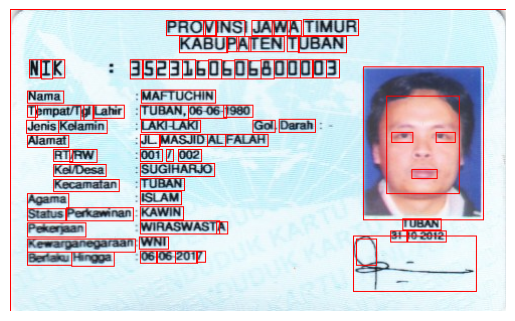

In [51]:
ktp_image = cv.imread('/content/drive/MyDrive/PVCK/Images/ktp3.png')

# Gaussian Blur
blurred_image = cv.GaussianBlur(ktp_image, (5, 5), 0.5)
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Output
ktp_rgb_image = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb_image)
plt.axis('off')
plt.show()

# TUGAS PRAKTIKUM



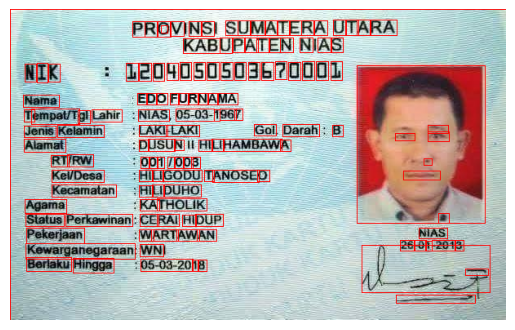

In [54]:
ktp_image = cv.imread('/content/drive/MyDrive/PVCK/Images/ktp5.png')

# Gaussian Blur
blurred_image = cv.GaussianBlur(ktp_image, (5, 5), 0.5)
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Output
ktp_rgb_image = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb_image)
plt.axis('off')
plt.show()